## Supervised Learning & Unsupervised Learning

### Gym data exercise
#### In this part, we took a dataset about different gym exercise

In [522]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [523]:
# Upload dataset
gym_data = pd.read_csv('./Data/gym_members_exercise_tracking.csv')

## Select colomn we want to keep
gym_col_to_keep = ['Age', 'Calories_Burned']
df_gym = gym_data[gym_col_to_keep].copy()
df_gym = df_gym[10:20]
df_gym

,Age,Calories_Burned
10,41,593.0
11,53,865.0
12,57,1013.0
13,41,794.0
14,20,1195.0
15,39,740.0
16,19,1111.0
17,41,884.0
18,47,742.0
19,55,1030.0


In [524]:
# Data cleaning
missing_values = df_gym.isnull().sum()
print("Missing values in each columns :")
print(missing_values)

Missing values in each columns :
Age                0
Calories_Burned    0
dtype: int64


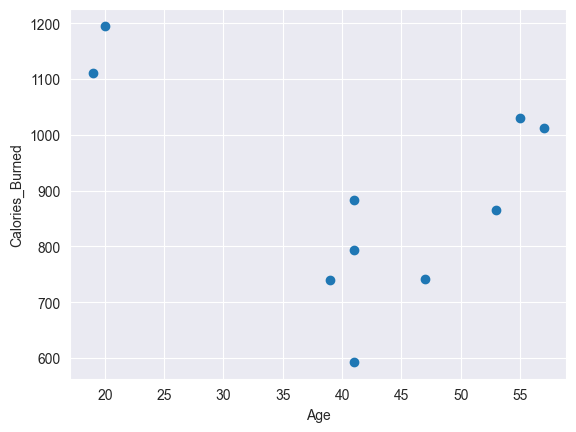

In [525]:
## This task will be unsupervised learning.
## Determinig K by visualization

## plot my two input columns
plt.scatter(df_gym.Age, df_gym['Calories_Burned'])
plt.xlabel('Age')
plt.ylabel('Calories_Burned')
plt.show()

In [526]:
## fitting value
scaler = MinMaxScaler()

scaler.fit(df_gym[['Calories_Burned']])
df_gym['Calories_Burned'] = scaler.transform(df_gym[['Calories_Burned']])

scaler.fit(df_gym[['Age']])
df_gym['Age'] = scaler.transform(df_gym[['Age']])

In [527]:
## By visualization we can assume that k = 3 (three clusters)
## We call machine learning model
km = KMeans(n_clusters=3)

y_predicted = km.fit_predict(df_gym[['Age', 'Calories_Burned']])
y_predicted

df_gym['cluster'] = y_predicted

km.cluster_centers_
df1 = df_gym[df_gym.cluster == 0]
df2 = df_gym[df_gym.cluster == 1]
df3 = df_gym[df_gym.cluster == 2]

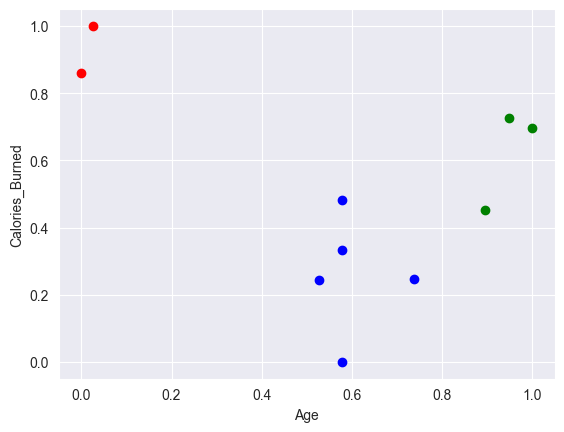

In [528]:
## Data visualization with group color
plt.scatter(df1.Age, df1['Calories_Burned'], color='green')
plt.scatter(df2.Age, df2['Calories_Burned'], color='red')
plt.scatter(df3.Age, df3['Calories_Burned'], color='blue')

plt.xlabel('Age')
plt.ylabel('Calories_Burned')
plt.show()

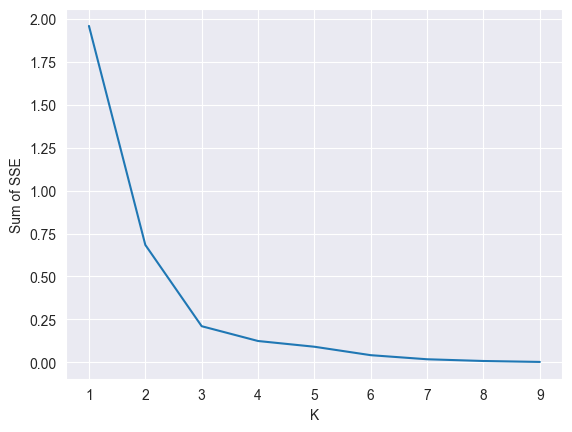

In [529]:
## Aply the elbow method
sse = []

k_range = range(1, 10)

for k in k_range:
    km_3 = KMeans(n_clusters = k)
    km_3.fit(df_gym[['Age', 'Calories_Burned']])
    sse.append(km_3.inertia_)

plt.xlabel('K')
plt.ylabel('Sum of SSE')
plt.plot(k_range, sse)